In [2]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# load the dataset
file_path = r"C:\Users\TUF\Desktop\mnsit\train.csv"
data = pd.read_csv(file_path)
# print the first five rows
print(data.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
# clean the data and get the target column
data = data.dropna()
data = data.drop_duplicates()
X = data.drop(["label"], axis=1)
y = data["label"]
print(f"X.shape is : {X.shape}")
print(f"y.shape is : {y.shape}")


X.shape is : (42000, 784)
y.shape is : (42000,)


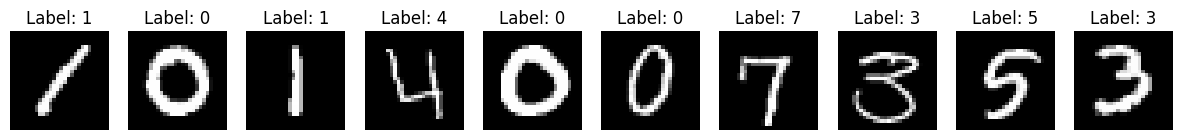

In [5]:
# Plot the first 10 digit of teh dataset

sample_images = X.head(10).values  
sample_labels = y.head(10).values 

# Reshape and plot the images
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    # Reshape the flattened image to a 28x28 array (for MNIST)
    image_reshaped = image.reshape(28, 28)
    axes[i].imshow(image_reshaped, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [15]:
# split the data for train and test
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# set up the nueral network model
model = Sequential([
    Input(shape=(784,)),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=10, activation="linear")
])
model.summary()
# compile the model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)                │     50,240 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 32)                │      2,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 10)                │        330 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print("Unique labels:", np.unique(y_train))
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3416 - loss: 2.1720 - val_accuracy: 0.5989 - val_loss: 1.2975
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6410 - loss: 1.1362 - val_accuracy: 0.7283 - val_loss: 0.8520
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7487 - loss: 0.7932 - val_accuracy: 0.7833 - val_loss: 0.6944
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 0.6537 - val_accuracy: 0.8279 - val_loss: 0.5921
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8353 - loss: 0.5545 - val_accuracy: 0.8515 - val_loss: 0.5242
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8517 - loss: 0.5044 - val_accuracy: 0.8575 - val_loss: 0.4826
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8669 - loss: 0.4551 - val_accuracy: 0.8708 - val_loss: 0.4459
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8

263/263 - 0s - 2ms/step - accuracy: 0.9156 - loss: 0.3008
Test Loss: 0.300784707069397
Test Accuracy: 0.9155952334403992
MODEL TRAINING HISTORY
training accuracy: [0.44485118985176086, 0.6717857122421265, 0.761696457862854, 0.8061904907226562, 0.838660717010498, 0.8569940328598022, 0.8680357336997986, 0.8774404525756836, 0.8835416436195374, 0.8896726369857788, 0.893750011920929, 0.897470235824585, 0.8998809456825256, 0.9034821391105652, 0.9063095450401306, 0.9089881181716919, 0.9120535850524902, 0.9140178561210632, 0.9169345498085022, 0.9182440638542175]
training loss: [1.9196748733520508, 1.0188567638397217, 0.7547354698181152, 0.6270787119865417, 0.544076144695282, 0.4873516261577606, 0.44718343019485474, 0.4184785783290863, 0.3982049822807312, 0.3806062340736389, 0.3664896786212921, 0.3534797430038452, 0.3416823148727417, 0.3309219181537628, 0.3205997049808502, 0.3125169575214386, 0.3037337064743042, 0.2951856255531311, 0.2872218191623688, 0.27985841035842896]
training validation ac

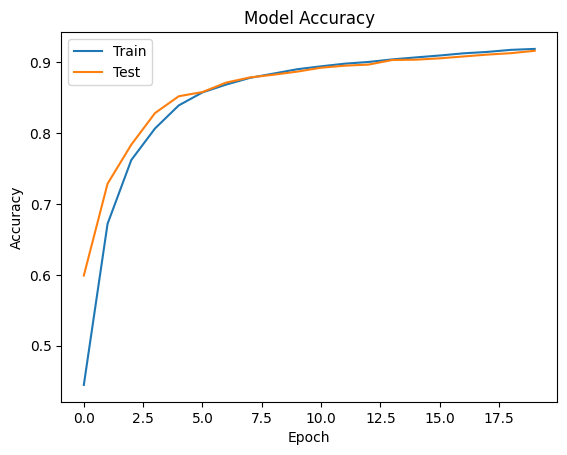

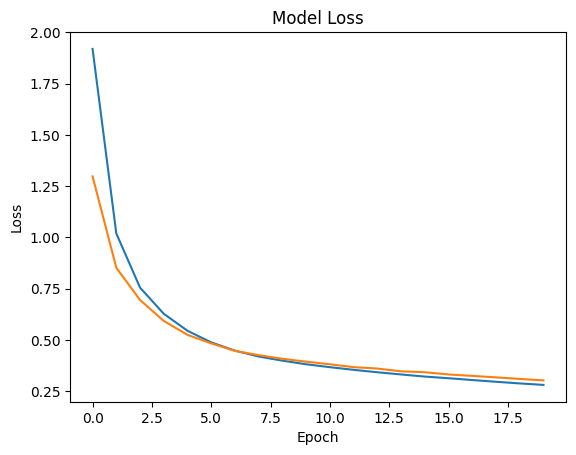

In [17]:
# print the model performance on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print("===============================")
print("MODEL TRAINING HISTORY")
print(f"training accuracy: {history.history['accuracy']}")
print(f"training loss: {history.history['loss']}")
print(f"training validation accuracy: {history.history['val_accuracy']}")
print(f"training val_loss: {history.history['val_loss']}")
print("==================================")

# plot the model performance
# plot accuacry value 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [18]:
# Prediction of the model
predictions = model.predict(X_test)
for i in range(20):
    print(f"Prediction: {np.argmax(predictions[i])}, True Label: {y_test.iloc[i]}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction: 8, True Label: 8
Prediction: 1, True Label: 1
Prediction: 9, True Label: 9
Prediction: 9, True Label: 9
Prediction: 8, True Label: 8
Prediction: 6, True Label: 6
Prediction: 2, True Label: 2
Prediction: 2, True Label: 2
Prediction: 7, True Label: 7
Prediction: 1, True Label: 1
Prediction: 6, True Label: 6
Prediction: 3, True Label: 3
Prediction: 1, True Label: 1
Prediction: 2, True Label: 2
Prediction: 7, True Label: 7
Prediction: 4, True Label: 4
Prediction: 3, True Label: 3
Prediction: 3, True Label: 3
Prediction: 6, True Label: 6
Prediction: 4, True Label: 4


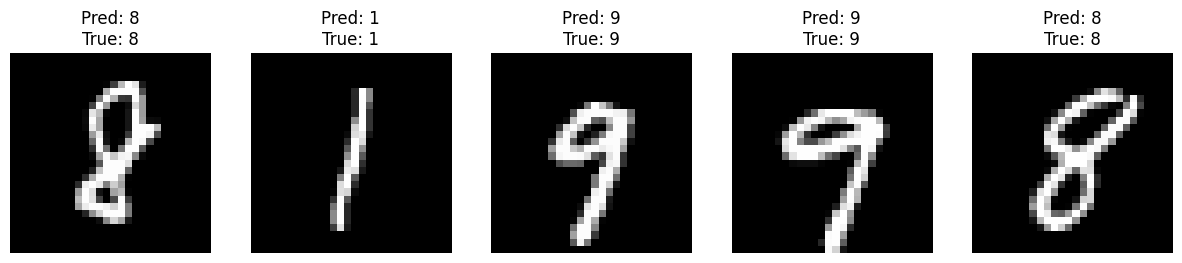

In [19]:

# Visualize the first 5 predictions along with the true labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    image = X_test.iloc[i].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test.iloc[i]}")
    ax.axis('off')

plt.show()
